<hr>  

#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography._
<br>

**Code is hosted [here](https://github.com/X-Fan-Jack/Study_Notes/blob/master/Coursework/CASA06/cw_casa06.ipynb)**<br>

**Data is availble [here](https://github.com/X-Fan-Jack/Study_Notes/tree/master/Coursework/CASA06/data)**<br>

<hr>

# Analysis and prediction of regional demand for taxis based on spatiotemporal sequence data: 
_the case of the New York City_  

This paper explores trip record data from the TLC in New York City, and based on the city's provided geographic boundaries, obtains temporal characteristics of demand relationships at the district level.  
It emphasizes the analysis of the changes in cab demand in each region over time to ultimately obtain a model that can predict changes in demand.


<hr>

# Guide
- [Passenger Behavior Patterns Based on Spatio-Temporal Sequences of Taxi Trajectory Data:](#passenger-behavior-patterns-based-on-spatio-temporal-sequences-of-taxi-trajectory-data-)
  * [1 Introduction](#1-introduction)
    + [1.1 Background](#11-background)
    + [1.2 Research question](#12-research-question)
    + [1.3 Requirements to run the analysis](#13-requirements-to-run-the-analysis)
  * [2 Literature Review](#2-literature-review)
  * [3 Presentation of data](#3-presentation-of-data)
  * [4 Methodology](#4-methodology)
  * [5 Analysis](#5-analysis)
  * [6 Results](#6-results)
  * [7 Discussion](#7-discussion)
  * [8 Conclusion](#8-conclusion)
  * [Bibliography](#bibliography)
  * [Appendix](#appendix)


## 1 Introduction

### 1.1 Background  

需要改————  
Taxis are an important means of transportation in urban areas, and accurately predicting taxi demand is essential for optimizing urban traffic and planning travel routes. In this study, we used trip data from taxis in New York City and applied spatial and temporal analysis methods to analyze and predict taxi demand in different regions of the city. By comparing three commonly used prediction algorithms, we identified the best model and used it to predict the trend of taxi demand for the next year. The results of this study can help optimize urban transportation planning and travel services, and improve the efficiency and convenience of urban travel.


### 1.2 Research question  
The aim of this research is to analyze the spatiotemporal characteristics of taxi demand in different regions based on the time series data of New York City's taxi trips, and use machine learning algorithms to make predictions, in order to provide decision support for urban transportation planning and taxi service optimization. Specifically, our research question is: How to analyze the spatiotemporal characteristics of taxi demand in different regions based on the time series data of New York City's taxi trips, and use machine learning algorithms to predict the future changes in taxi demand in each region?

### 1.3 Requirements to run the analysis

An overview of packages used to run the analysis with brief explanation of their role.

In [19]:
import pyarrow.parquet as pq
import pyarrow as pa
import pyarrow.compute as pc
import pandas as pd
import numpy as np
import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from fastparquet import ParquetFile
import sqlite3
from tqdm import tqdm

In [20]:
# 连接数据库
conn = sqlite3.connect('data/FHVData.db')
# 创建游标对象
cur = conn.cursor()

In [ ]:
# # table = pq.read_table('data/FHV_data/2019/fhv_tripdata_2019-07.parquet')
# schema = pa.schema([
#     ('pickup_datetime', pa.timestamp('ns')),
#     ('dropOff_datetime', pa.timestamp('ns')),
#     ('PUlocationID', pa.int64()),
#     ('DOlocationID', pa.int64())
# ])
# col = ['pickup_datetime',
#        'dropOff_datetime',
#        'PUlocationID',
#        'DOlocationID']
# # table = pd.read_parquet('data/FHV_data/2019/fhv_tripdata_2019-07.parquet')
# df = pd.read_parquet('data/FHV_data/2019/fhv_tripdata_2019-07.parquet', columns=col, schema=schema)


<hr>

## 2 Literature Review  

<hr>

## 3 Presentation of data 

数据描述，
TLC将纽约市分为了六个大区，263个小区。其中表现如下。放一张地图吧。

In [ ]:
# 读取shapefile文件
shp_file = 'data/taxi_zones/taxi_zones.shp'
map_df = gpd.read_file(shp_file)

# 绘制地图
fig, ax = plt.subplots(figsize=(10,10))
map_df.plot(ax=ax, alpha=0.5, edgecolor='k')
plt.show()

<hr>

## 4 Methodology 

<hr>

## 5 Analysis

In [22]:
# 指定要读取的文件路径
file_path = "data/FHV_data/fhv_tripdata_*.parquet"

# 指定要读取的列名
usecols = ['pickup_datetime', 'dropOff_datetime', 'PUlocationID', 'DOlocationID']

# 获取匹配的文件路径列表
file_list = glob.glob(file_path)


# 将每个文件的数据读取并追加到 fhv_data 表中
for file in tqdm(file_list, desc="Processing files"):
    df = pd.read_parquet(file, columns=usecols)
    df.drop([col for col in df.columns if col not in usecols], axis=1, inplace=True)
    df.columns = ['pickup_datetime', 'dropoff_datetime', 'PUlocationID', 'DOlocationID']
    df['pickup_datetime'] = df['pickup_datetime'].astype('datetime64[ns]')
    df['dropoff_datetime'] = df['dropoff_datetime'].astype('datetime64[ns]')
    # df['PUlocationID'] = df['PUlocationID'].astype('int')
    # df['DOlocationID'] = df['DOlocationID'].astype('int')
    df.to_sql('fhv_data', conn, if_exists='append', index=False)



Processing files: 100%|██████████| 37/37 [04:32<00:00,  7.35s/it]


In [ ]:
# conn.close()
# cur.close()

In [17]:
# 查询数据
cur.execute("SELECT * FROM fhv_data LIMIT 20")
list = []
rows = cur.fetchall()
for row in tqdm(rows,desc="read data"):
    list.append(row)



read data: 100%|██████████| 20/20 [00:00<00:00, 20058.84it/s]


'2020-01-01 00:47:00'

2019年的部分数据dropoff_datetime有错误    
在处理过程中真的是要疯了    
  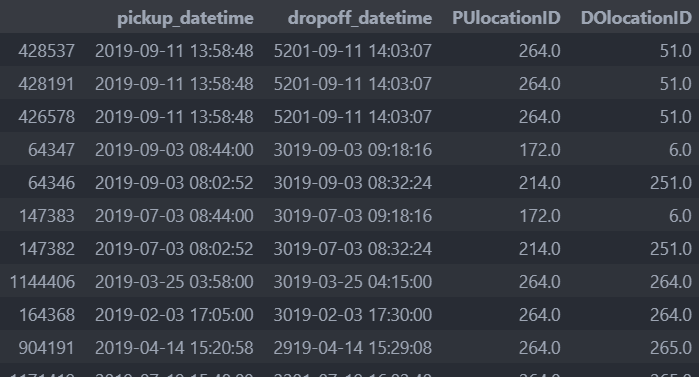

In [ ]:
# df_sub['PUlocationID'] = df_sub['PUlocationID'].astype('int')
# df_sub['DOlocationID'] = df_sub['DOlocationID'].astype('int')
# df_sub.info()

对于NaN的处理，   
不包含19年的数据
如果OD的locationID的NaN处理方式为或,数据留存率为.[0.7589647428166336, 0.17290031620507976, 0.23250138647091056, 0.21057685404551654]   
如果OD的locationID的NaN处理方式为与,数据留存率为. [0.9623456346122385, 0.8619116915502695, 0.8487670331948148, 0.8399355660851461]    
包含19年的数据   
如果OD的locationID的NaN处理方式为或,数据留存率为.[0.9530752860826389, 0.7589647428166336, 0.17290031620507976, 0.23250138647091056, 0.21057685404551654]   
如果OD的locationID的NaN处理方式为与,数据留存率为. [0.9834086262272985, 0.9623456346122385, 0.8619116915502695, 0.8487670331948148, 0.8399355660851461]

In [12]:
# 如果行包含NaN则删除该行
df_clean_or = df_sub.dropna()

# df_clean.info()
# df_clean.head()

# 按年统计数据清洗率
clean_rates = []
for year in df_clean_or['pickup_datetime'].dt.year.unique():
    # 计算每一年的总行数和去除NaN后的行数
    total_count = len(df_sub[df_sub['pickup_datetime'].dt.year == year])
    clean_count = len(df_clean_or[df_clean_or['pickup_datetime'].dt.year == year])
    # 计算比例
    clean_rate = clean_count / total_count
    clean_rates.append(clean_rate)

# 输出结果
print(clean_rates)

[0.9530752860826389, 0.7589647428166336, 0.17290031620507976, 0.23250138647091056, 0.21057685404551654]


In [13]:
# 如果PUlocationID、DOlocationID中所有元素都为NaN，则删除该行。
df_clean_and = df_sub.dropna(subset=['PUlocationID', 'DOlocationID'], how='all')

# 按年统计数据清洗率
clean_rates = []
for year in df_clean_and['pickup_datetime'].dt.year.unique():
    # 计算每一年的总行数和去除NaN后的行数
    total_rows = len(df_sub[df_sub['pickup_datetime'].dt.year == year])
    clean_rows = len(df_clean_and[df_clean_and['pickup_datetime'].dt.year == year])
    # 计算比例
    clean_rate = clean_rows / total_rows
    clean_rates.append(clean_rate)

print(clean_rates)

[0.9834086262272985, 0.9623456346122385, 0.8619116915502695, 0.8487670331948148, 0.8399355660851461]


不同数据清洗方案的数据留存率比较图

In [ ]:
df_clean_or_grouped = df_clean_or.groupby(df_clean_or['pickup_datetime'].dt.strftime('%Y-%m')).size()

In [ ]:
df_clean_and_grouped = df_clean_and.groupby(df_clean_and['pickup_datetime'].dt.strftime('%Y-%m')).size()

In [ ]:
df_sub_grouped = df_sub.groupby(df_sub['pickup_datetime'].dt.strftime('%Y-%m')).size()

In [ ]:
df_sub_grouped.head()

pickup_datetime
2020-01    2028587
2020-02    1913495
2020-03    1441864
2020-04     566426
2020-05     774970
dtype: int64

In [ ]:
type(df_sub_grouped)

pandas.core.series.Series

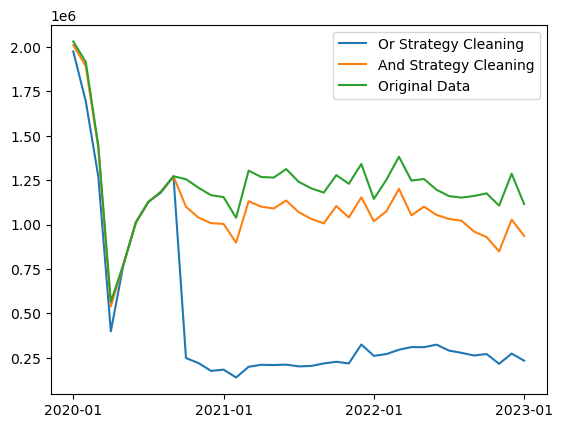

In [ ]:
# 绘制折线图
plt.plot(df_clean_or_grouped.index, df_clean_or_grouped, label='Or Strategy Cleaning')
plt.plot(df_clean_and_grouped.index, df_clean_and_grouped, label='And Strategy Cleaning')
plt.plot(df_sub_grouped.index, df_sub_grouped, label='Original Data')

# x轴只显示每一年的第一个月
year_starts = df_sub_grouped[df_sub_grouped.index.str.endswith('-01')].index
plt.xticks(year_starts)

plt.legend()
plt.show()

In [ ]:
# 按年份拆分数据
df_clean_or_yearly = [g for n, g in df_clean_or.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))]
df_clean_and_yearly = [g for n, g in df_clean_and.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))]
df_sub_yearly = [g for n, g in df_sub.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))]

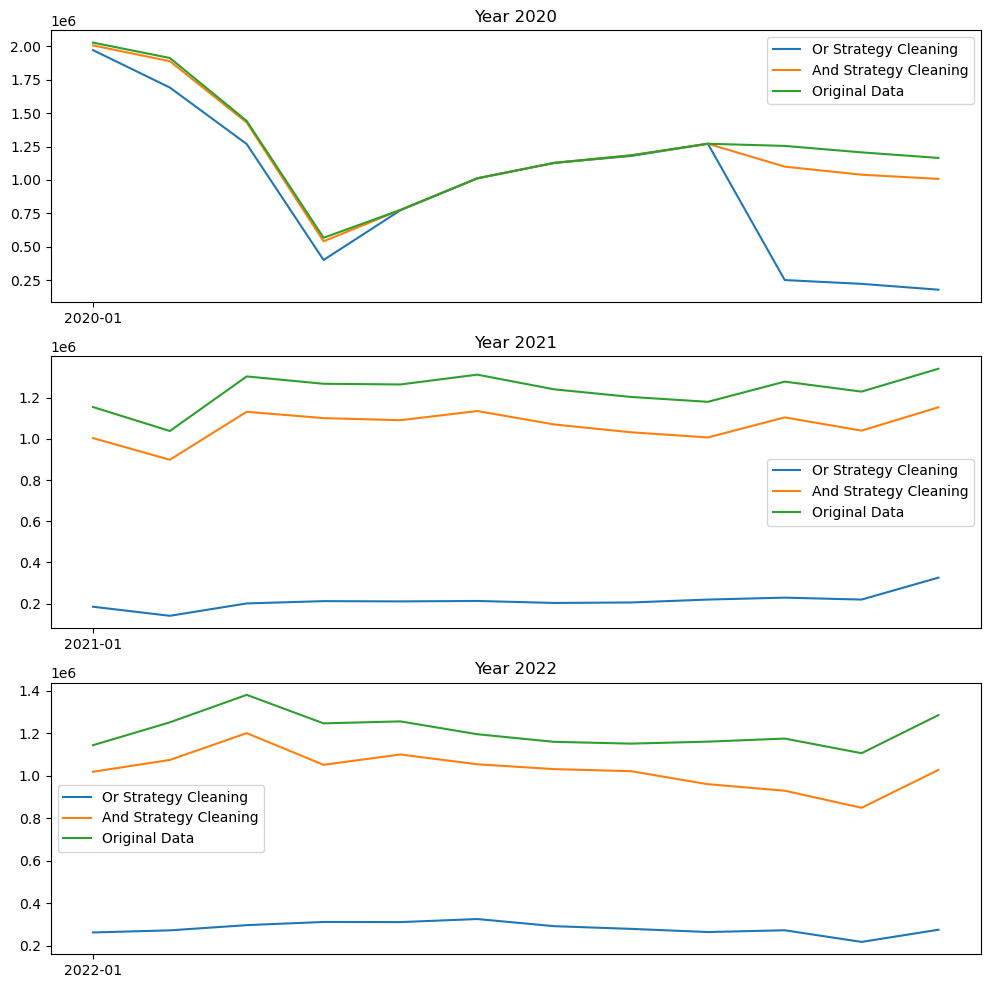

In [ ]:
# 绘制三个折线图，每个折线图包含三条折线
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

for i, year in enumerate(['2019','2020', '2021', '2022']):
    # 提取当前年份的数据
    df_clean_or_grouped = df_clean_or_yearly[i].groupby(df_clean_or_yearly[i]['pickup_datetime'].dt.strftime('%Y-%m')).size()
    df_clean_and_grouped = df_clean_and_yearly[i].groupby(df_clean_and_yearly[i]['pickup_datetime'].dt.strftime('%Y-%m')).size()
    df_sub_grouped = df_sub_yearly[i].groupby(df_sub_yearly[i]['pickup_datetime'].dt.strftime('%Y-%m')).size()
    
    # 绘制当前年份的折线图
    axes[i].plot(df_clean_or_grouped.index, df_clean_or_grouped, label='Or Strategy Cleaning')
    axes[i].plot(df_clean_and_grouped.index, df_clean_and_grouped, label='And Strategy Cleaning')
    axes[i].plot(df_sub_grouped.index, df_sub_grouped, label='Original Data')
    
    # 添加图例和标题
    axes[i].legend()
    axes[i].set_title(f'Year {year}')
    
    # 设置x轴只显示每年的第一个月
    axes[i].set_xticks(df_clean_or_grouped.index[::12])
    
# 显示图形
plt.show()

从原始数据的角度出发，20年的出租车使用量有大幅度的下降。若不考虑数据采集本身造成的系统误差的情况下，造成这种结果的主要原因应该为新冠疫情的爆发。
2020年3月1日，第一个COVID-19病例被证实，到3月29日，超过30,000个病例被证实。 为了应对疫情，纽约州州长办公室于3月20日发布行政命令，关闭 "非必要 "企业。封锁将病毒热点根据其严重程度在地图上划分为红色、橙色和黄色区域。封锁还对宗教场所和餐馆进行了严格限制。timeline：https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986

经过几个月的恢复，出租车的使用量逐渐回升



<hr>

## 6 Results

<hr>

## 7 Discussion

<hr>

## 8 Conclusion

<hr>

## Bibliography

<hr>

## Appendix

**Data Source**:   
TLC Trip Record Data - TLC: [https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

碎碎念

我打算基于TLC的数据，对数据进行简单的EDA；然后对同一数据集（2020，2021和2022年的数据为训练集，2023年作为检验集）使用三种算法（分别为CART，ARIMA，LSTM或者Prophet中的一个）来进行预测，最终对模型结果进行一个比较和评估。